In [109]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import re
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [44]:
query = "online education since:2020-03-01 until:2021-03-01"
tweets = []
limit = 10000

In [45]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])

C:\Users\senak\AppData\Local\Temp\ipykernel_11968\1623108765.py:5: DeprecatedFeatureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.date, tweet.username, tweet.content])
C:\Users\senak\AppData\Local\Temp\ipykernel_11968\1623108765.py:5: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.username, tweet.content])


In [46]:
df = pd.DataFrame(tweets, columns=['date', 'username','tweet'])
print(df)

                          date         username  \
0    2021-02-28 23:45:00+00:00      moritherapy   
1    2021-02-28 23:26:39+00:00  melodyofmiracle   
2    2021-02-28 22:13:02+00:00   SmartGearsShop   
3    2021-02-28 22:07:23+00:00  Pepe_DontPreach   
4    2021-02-28 22:01:13+00:00       ahsen_koca   
...                        ...              ...   
9995 2021-01-18 07:39:03+00:00   FranchiseIndia   
9996 2021-01-18 07:37:28+00:00          G_Haile   
9997 2021-01-18 07:36:34+00:00  Medical90126344   
9998 2021-01-18 07:34:06+00:00      HammadTalks   
9999 2021-01-18 07:24:23+00:00      sb_qureshii   

                                                  tweet  
0     @lithohedron I have a degree in distance/onlin...  
1     Sadece online eğitimin yapıldığı öğretim yılın...  
2     "TOP 10 ONLINE LEARNING WEBSITES - We have cre...  
3     @ndombpele28 God, glad you’re going back to sc...  
4     How to use Flipgrid? https://t.co/9Gmk6Pir0w v...  
...                                    

In [47]:
df.head()

,date,username,tweet
0,2021-02-28 23:45:00+00:00,moritherapy,@lithohedron I have a degree in distance/onlin...
1,2021-02-28 23:26:39+00:00,melodyofmiracle,Sadece online eğitimin yapıldığı öğretim yılın...
2,2021-02-28 22:13:02+00:00,SmartGearsShop,"""TOP 10 ONLINE LEARNING WEBSITES - We have cre..."
3,2021-02-28 22:07:23+00:00,Pepe_DontPreach,"@ndombpele28 God, glad you’re going back to sc..."
4,2021-02-28 22:01:13+00:00,ahsen_koca,How to use Flipgrid? https://t.co/9Gmk6Pir0w v...


In [48]:
df.tail()

,date,username,tweet
9995,2021-01-18 07:39:03+00:00,FranchiseIndia,.@BYJUS India’s biggest #onlineeducation #star...
9996,2021-01-18 07:37:28+00:00,G_Haile,"@nickmangwana Sir, I also want to remind you o..."
9997,2021-01-18 07:36:34+00:00,Medical90126344,And government is still sleeping\nWth would be...
9998,2021-01-18 07:34:06+00:00,HammadTalks,RIP Pakistan Education system 🙏\nA girl studyi...
9999,2021-01-18 07:24:23+00:00,sb_qureshii,@HamidMirPAK @geonews_urdu @ICT_Police @CPJAsi...


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      10000 non-null  datetime64[ns, UTC]
 1   username  10000 non-null  object             
 2   tweet     10000 non-null  object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 234.5+ KB


In [50]:
print(df['tweet'].iloc[0],"\n")
print(df['tweet'].iloc[1],"\n")
print(df['tweet'].iloc[2],"\n")
print(df['tweet'].iloc[3],"\n")
print(df['tweet'].iloc[4],"\n")


@lithohedron I have a degree in distance/online education. How are these poor teachers supposed to pick up how to instruct their kids off the side of their desks, especially when many of them are half mad with fears re Covid? From what I understand, they haven't gotten the support they need. 

Sadece online eğitimin yapıldığı öğretim yılında sınavların yüz yüze olması mı?Tam Türkiye'ye göre bir hareket.
Is it only that exams are face-to-face in the academic year when online education is held?A move befitting a country like Turkey.
#NoticeTurkishStudents 

"TOP 10 ONLINE LEARNING WEBSITES - We have created a list of the top 10 online learning websites for you".

https://t.co/BiLmRtk4cf
@onlineedu4all
@Onlineeducation
@OnlineEduNet https://t.co/LUtZ7Fe0Qb 

@ndombpele28 God, glad you’re going back to school tomorrow. Online education has really gotten to you. 

How to use Flipgrid? https://t.co/9Gmk6Pir0w via @YouTube 
•
•
•
#distancelearning #Application #distanceteaching #flipgrid #onl

In [51]:
print(df.iloc[:5, 2])

0    @lithohedron I have a degree in distance/onlin...
1    Sadece online eğitimin yapıldığı öğretim yılın...
2    "TOP 10 ONLINE LEARNING WEBSITES - We have cre...
3    @ndombpele28 God, glad you’re going back to sc...
4    How to use Flipgrid? https://t.co/9Gmk6Pir0w v...
Name: tweet, dtype: object


In [1]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '', text, flags=re.MULTILINE) #\S+ means “a string of non-whitespace characters” where \s+ means “a string of whitespace characters”
    #boşluk içermeyen stringleri elemek istediğim için \S+ yazıyoruz
    #'|' karakteri sanırım 'ya da'yı temsil ediyor 
    text = re.sub(r'\@\w+|\#','',text) # removing @ symbol with the username and #
    text = re.sub(r'[^\w\s]','',text) #'^' is for 'isn't' where '\w' is for words and '\s' is for white space characters 
    # so the meaning of ^\w\s is anything that isn't a word or a whitespace character
    text_tokens = word_tokenize(text) # kelimeleri kelimelerine ayırıp list yapıyor
    filtered_text = [w for w in text_tokens if not w in stop_words] # stop wordleri (in, is, the vb.) filtreliyor
    return " ".join(filtered_text)


In [2]:
df.tweet = df['tweet'].apply(data_processing)

NameError: name 'df' is not defined

In [54]:
df = df.drop_duplicates('tweet')

In [55]:
df.tweet

0       lithohedron degree distanceonline education po...
1       sadece online eğitimin yapıldığı öğretim yılın...
2       top 10 online learning websites created list t...
3       ndombpele28 god glad youre going back school t...
4       use flipgrid via youtube distancelearning appl...
                              ...                        
9995    byjus indias biggest onlineeducation startup s...
9996    nickmangwana sir also want remind issue high c...
9997    government still sleeping wth would responsibl...
9998    rip pakistan education system girl studying um...
9999    hamidmirpak geonews_urdu ict_police cpjasia rs...
Name: tweet, Length: 8384, dtype: object

In [56]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [57]:
df['polarity'] = df['tweet'].apply(polarity)

In [58]:
def sentiment(label):
    if label<0:
        return "Negative"
    elif label==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [59]:
df['sentiment'] = df['polarity'].apply(sentiment)

<AxesSubplot: xlabel='sentiment', ylabel='count'>

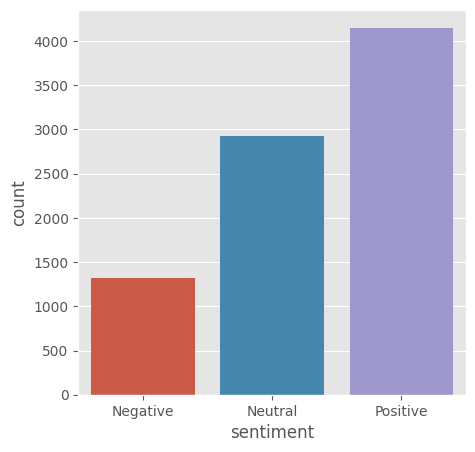

In [60]:
fig = plt.figure(figsize=(5, 5))
sns.countplot(x='sentiment', data=df)

Text(0.5, 1.0, 'Distribution of Sentiments')

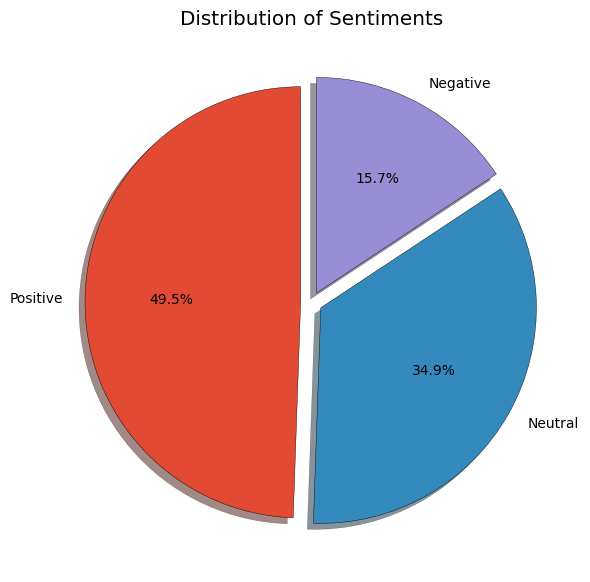

In [61]:
fig = plt.figure(figsize=(7,7))
explode = (0.05, 0.05, 0.05)
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=explode, label='', startangle=90, wedgeprops={'linewidth':0.3, 'edgecolor':"black"}, shadow=True)
plt.title('Distribution of Sentiments')

Word Clouds

In [62]:
pos_tweets = df[df['sentiment'] == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending=False)
pos_tweets.head()

,date,username,tweet,polarity,sentiment
991,2021-02-24 17:33:37+00:00,websiteclones,looking best educationsoftware management solu...,1.0,Positive
9027,2021-01-21 13:09:43+00:00,dominic_sensei,damien_page pandemic teaching archive experien...,1.0,Positive
3177,2021-02-14 14:44:17+00:00,MillerStillSuxs,gtconway3d online education best,1.0,Positive
290,2021-02-27 15:52:21+00:00,shivharshindia,kg_suresh mcu_bhopal officialignou mcurewa iim...,1.0,Positive
2049,2021-02-19 10:55:21+00:00,itcareerswap,online education limitations blog notes advant...,1.0,Positive


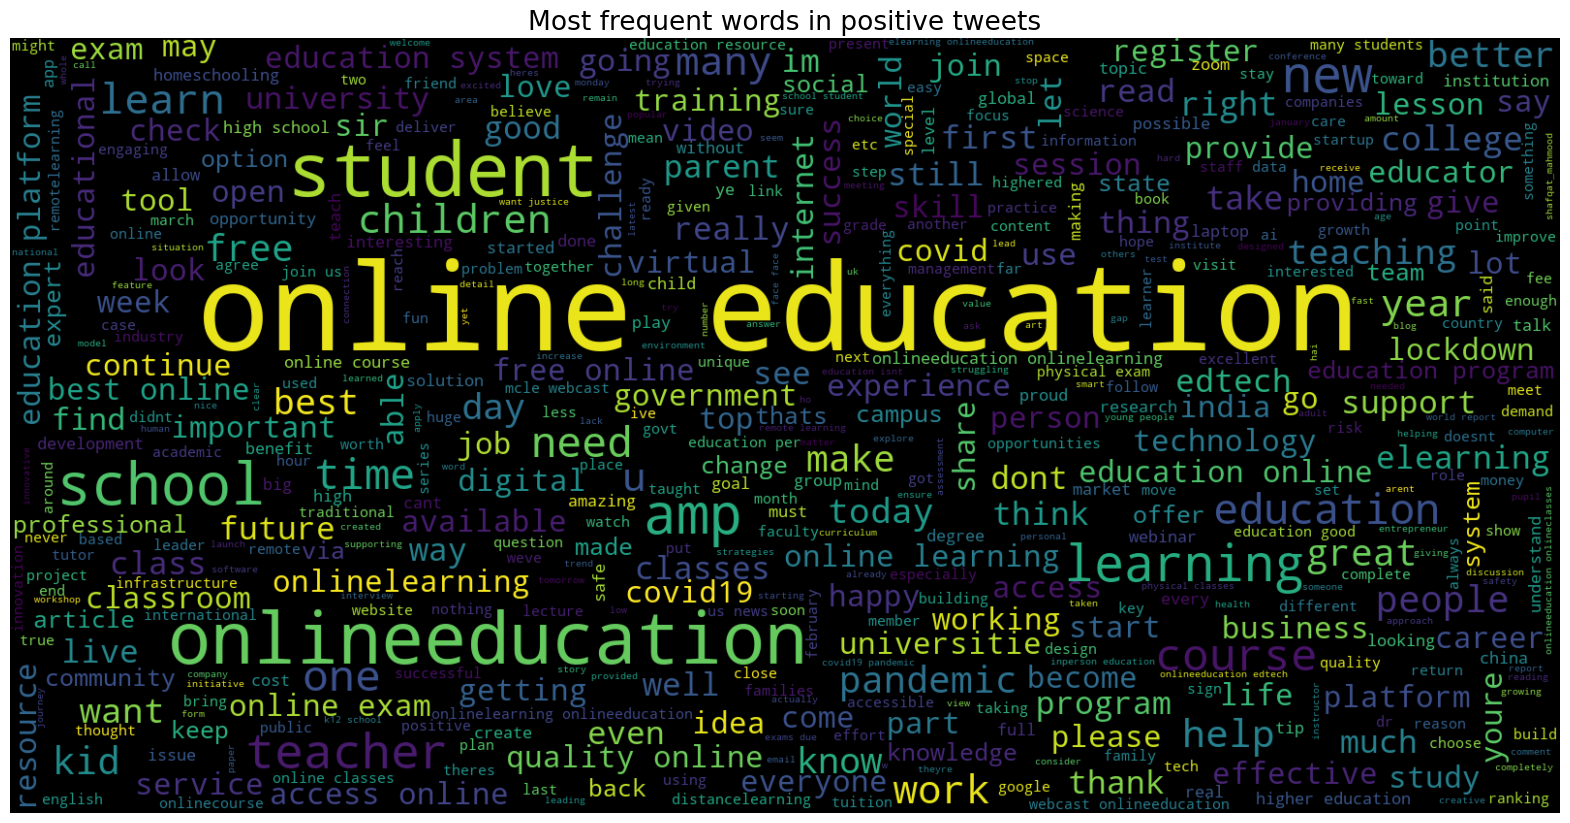

In [63]:
text = ' '.join([word for word in pos_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [64]:
neg_tweets = df[df['sentiment'] == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending=False)
neg_tweets.head()

,date,username,tweet,polarity,sentiment
3953,2021-02-10 13:32:08+00:00,SusanCl28446489,early chegg online education platform exploded...,-1.387779e-17,Negative
2963,2021-02-15 20:25:05+00:00,PhelisaRicketts,fight quality education pandemic western stem ...,-1.666667e-03,Negative
9769,2021-01-18 19:59:08+00:00,MuzammilTahir00,sajidhussyn whats guarantee covid affect stude...,-3.333333e-03,Negative
7705,2021-01-25 22:37:51+00:00,BuzzmanNo1,antcon7062 didnt catch full conversation tweet...,-3.409091e-03,Negative
5570,2021-02-02 21:37:53+00:00,neilmosley5,online education niche prior pandemic quite po...,-4.166667e-03,Negative


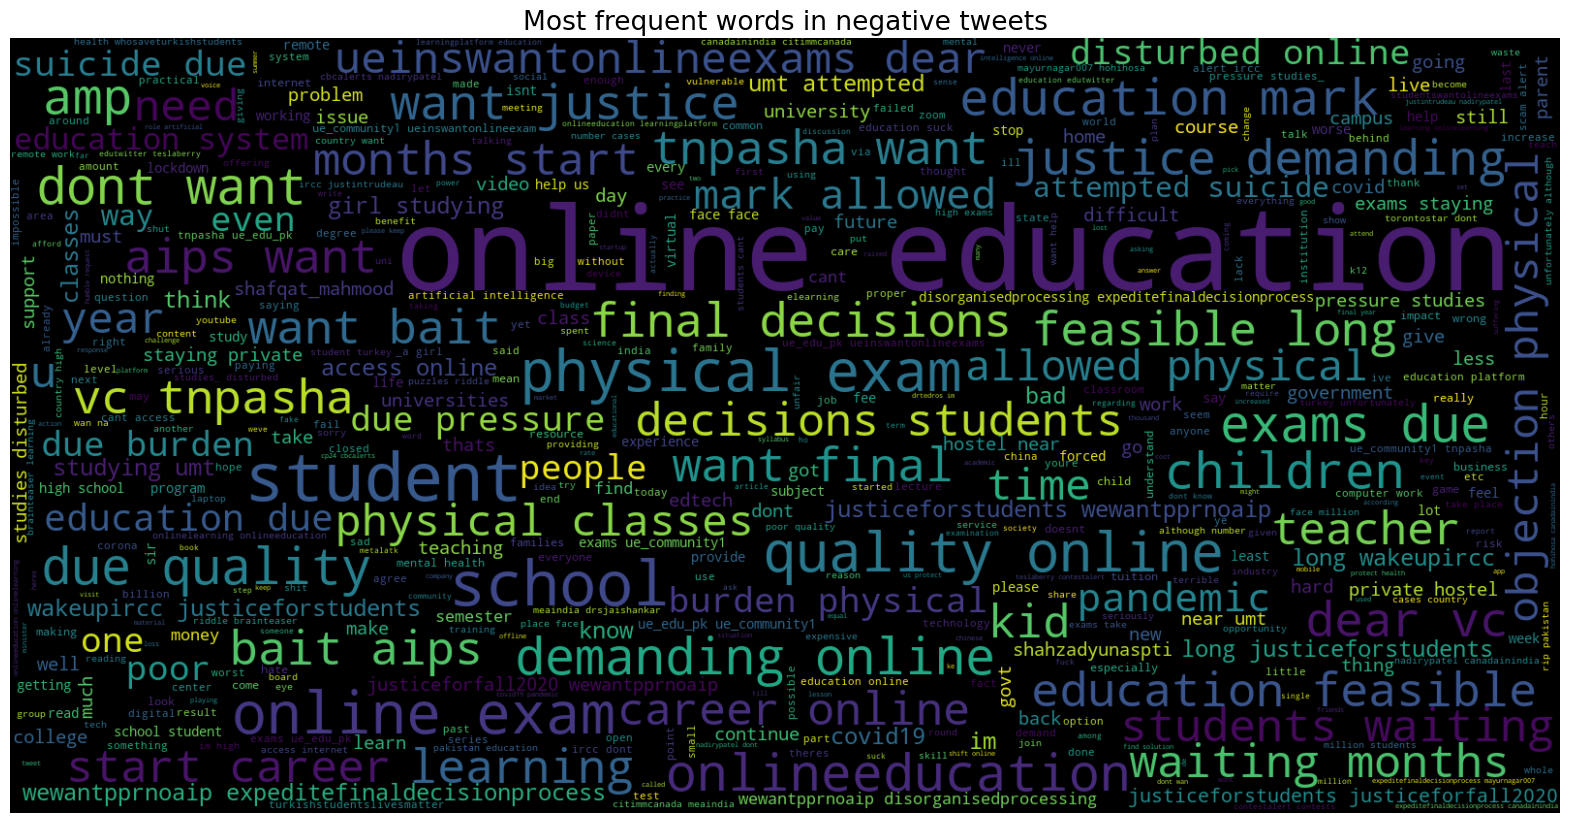

In [65]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [66]:
neutral_tweets = df[df['sentiment'] == 'Negative']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending=False)
neutral_tweets.head()

,date,username,tweet,polarity,sentiment
3953,2021-02-10 13:32:08+00:00,SusanCl28446489,early chegg online education platform exploded...,-1.387779e-17,Negative
2963,2021-02-15 20:25:05+00:00,PhelisaRicketts,fight quality education pandemic western stem ...,-1.666667e-03,Negative
9769,2021-01-18 19:59:08+00:00,MuzammilTahir00,sajidhussyn whats guarantee covid affect stude...,-3.333333e-03,Negative
7705,2021-01-25 22:37:51+00:00,BuzzmanNo1,antcon7062 didnt catch full conversation tweet...,-3.409091e-03,Negative
5570,2021-02-02 21:37:53+00:00,neilmosley5,online education niche prior pandemic quite po...,-4.166667e-03,Negative


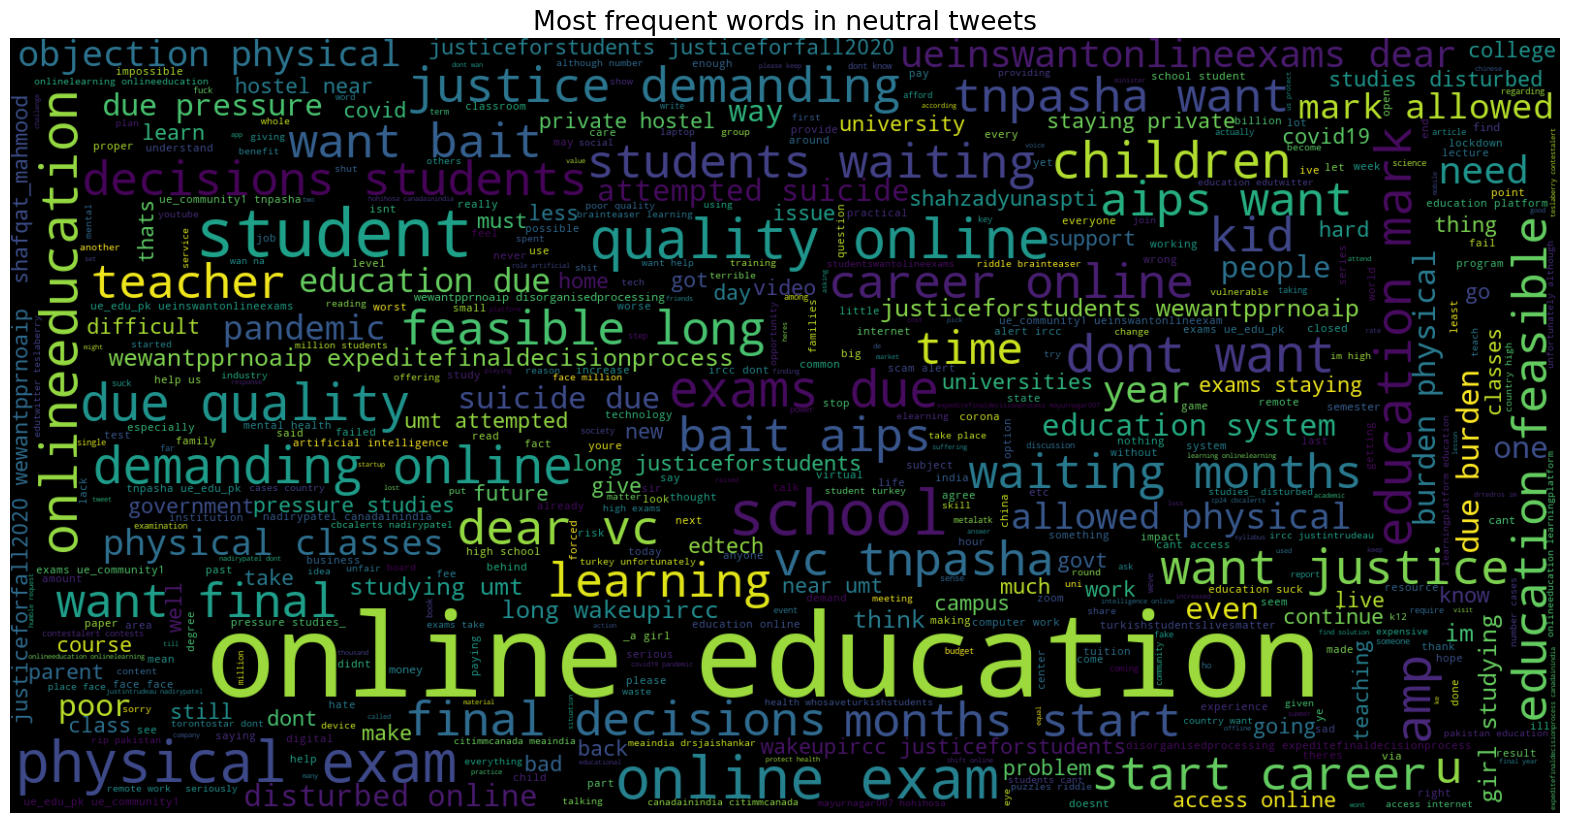

In [67]:
text = ' '.join([word for word in neutral_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

Vectorization

n-gram is a subsection of vectorization

In [68]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['tweet'])

In [69]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: {}\n".format(feature_names[:20]))

Number of features: 128205

First 20 features: ['000' '000 exams' '000 per' '00003524203' '00003524203 dey_supreme' '010'
 '010 stock' '01000611964' '01000611964 stay_home' '0103333729'
 '0103333729 technical' '011' '011 467' '01476386706'
 '01476386706 07398939698' '015' '0165' '0165 metx' '019' '019 scaling']



In [70]:
X = df['tweet']
Y = df['sentiment']
X = vect.transform(X)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [72]:
print("Size of x_train:", x_train.shape)
print("Size of y_train:", y_train.shape)
print("Size of x_test:", x_test.shape)
print("Size of y_test:", y_test.shape)

Size of x_train: (6707, 128205)
Size of y_train: (6707,)
Size of x_test: (1677, 128205)
Size of y_test: (1677,)


Logistic Regression

In [76]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 81.75%


c:\Users\senak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[142  70  61]
 [  6 533  66]
 [ 20  83 696]]


              precision    recall  f1-score   support

    Negative       0.85      0.52      0.64       273
     Neutral       0.78      0.88      0.83       605
    Positive       0.85      0.87      0.86       799

    accuracy                           0.82      1677
   macro avg       0.82      0.76      0.78      1677
weighted avg       0.82      0.82      0.81      1677



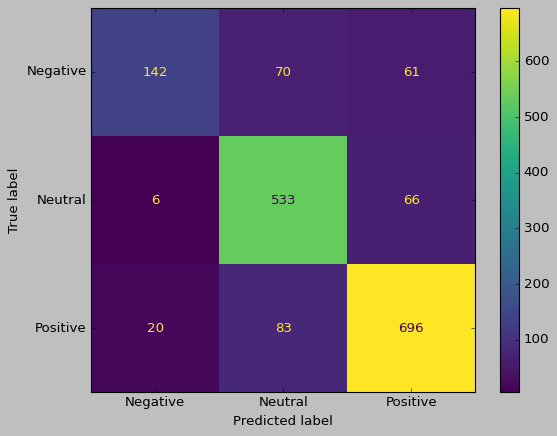

In [80]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

Support Vector Classification

In [84]:
SVCModel = LinearSVC()
SVCModel.fit(x_train, y_train)

LinearSVC()

In [96]:
svc_pred = SVCModel.predict(x_test)
svc_acc = accuracy_score(y_test, svc_pred)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 82.95%


In [97]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[150  72  51]
 [  8 549  48]
 [ 18  89 692]]


              precision    recall  f1-score   support

    Negative       0.85      0.55      0.67       273
     Neutral       0.77      0.91      0.83       605
    Positive       0.87      0.87      0.87       799

    accuracy                           0.83      1677
   macro avg       0.83      0.77      0.79      1677
weighted avg       0.83      0.83      0.82      1677



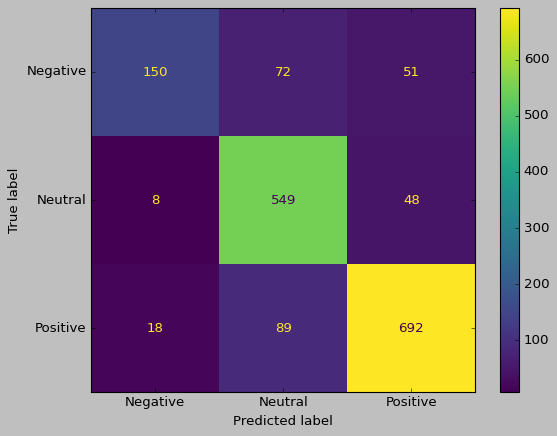

In [98]:
style.use('classic')
cm = confusion_matrix(y_test, svc_pred, labels=SVCModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVCModel.classes_)
disp.plot()

Random Forest Algorithm

In [102]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [103]:
rf_pred = random_forest.predict(x_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("test accuracy: {:.2f}%".format(rf_acc*100))

test accuracy: 80.02%


In [107]:
print(confusion_matrix(y_test, rf_pred))
print("\n")
print(classification_report(y_test, rf_pred))

[[106  80  87]
 [  1 546  58]
 [  8 101 690]]


              precision    recall  f1-score   support

    Negative       0.92      0.39      0.55       273
     Neutral       0.75      0.90      0.82       605
    Positive       0.83      0.86      0.84       799

    accuracy                           0.80      1677
   macro avg       0.83      0.72      0.74      1677
weighted avg       0.81      0.80      0.79      1677



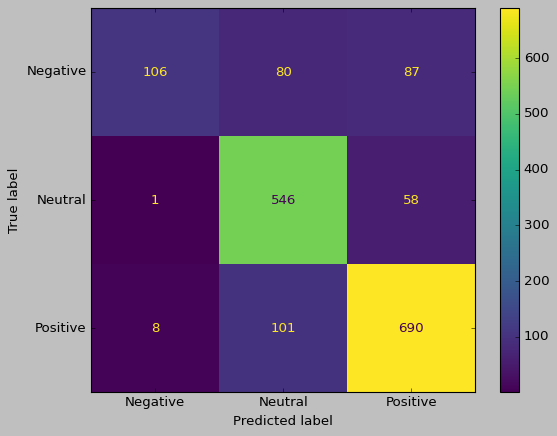

In [108]:
style.use('classic')
cm = confusion_matrix(y_test, rf_pred, labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest.classes_)
disp.plot()

Naive Bayes Algorithm

In [111]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train.toarray(), y_train)

GaussianNB()

In [114]:
nb_pred = naive_bayes.predict(x_test.toarray())
nb_acc = accuracy_score(y_test, nb_pred)
print("test accuracy: {:.2f}".format(nb_acc*100))

test accuracy: 66.79


In [115]:
print(confusion_matrix(y_test, nb_pred))
print("\n")
print(classification_report(y_test, nb_pred))

[[116  18 139]
 [ 58 305 242]
 [ 48  52 699]]


              precision    recall  f1-score   support

    Negative       0.52      0.42      0.47       273
     Neutral       0.81      0.50      0.62       605
    Positive       0.65      0.87      0.74       799

    accuracy                           0.67      1677
   macro avg       0.66      0.60      0.61      1677
weighted avg       0.69      0.67      0.66      1677



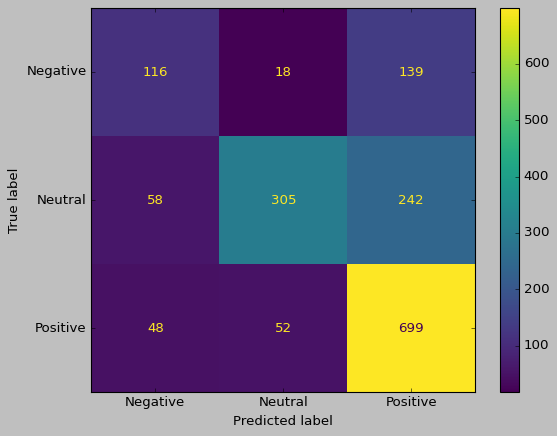

In [117]:
style.use('classic')
cm = confusion_matrix(y_test, nb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
disp.plot()